In [1]:
# import the dataset
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
my_data = fetch_ucirepo(id=15)

# describe my_data
print(my_data.variables)

# data (as pandas dataframes)
X = my_data.data.features
y = my_data.data.targets

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

In [2]:
# prompt: How many missing values does Bare_nuclei have? Please check in X

# Check for missing values in 'Bare_nuclei' column
missing_values_count = X['Bare_nuclei'].isnull().sum()
print(f"Number of missing values in 'Bare_nuclei': {missing_values_count}")

Number of missing values in 'Bare_nuclei': 16


In [3]:
# Remove the missing values
X = X.dropna()
rows_to_keep = X.index
y = y.loc[rows_to_keep]

X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
import numpy as np
y.value_counts(normalize=True)* 100 # percentage

,proportion
Class,
2,65.007321
4,34.992679


In [7]:
y = y.replace(2,0)
y = y.replace(4,1)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [10]:
#Create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

478
205


In [11]:
# prompt: Train a logistic regression classifier on X_train

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Train the classifier
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [12]:
# prompt: Calculate the accuracy, recall, specificity, precision and f1 on the test set

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.9560975609756097
Recall: 0.9102564102564102
Precision: 0.9726027397260274
F1 Score: 0.9403973509933775
Confusion Matrix:
[[125   2]
 [  7  71]]
Specificity: 0.984251968503937


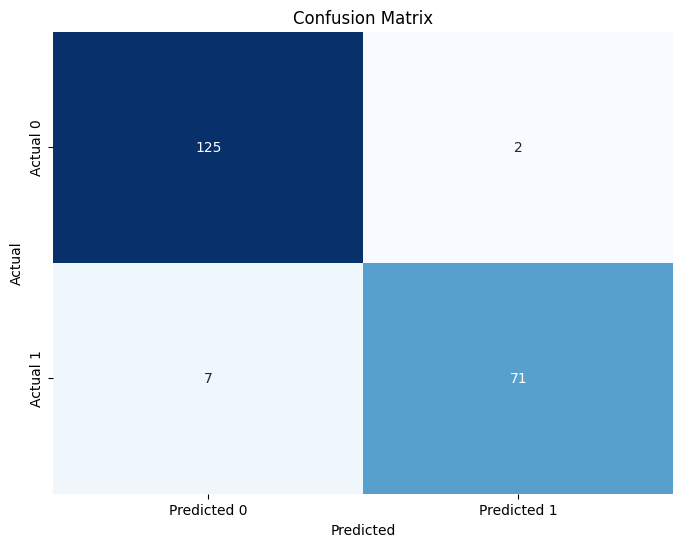

In [13]:
# prompt: Plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is the confusion matrix calculated in the previous code

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

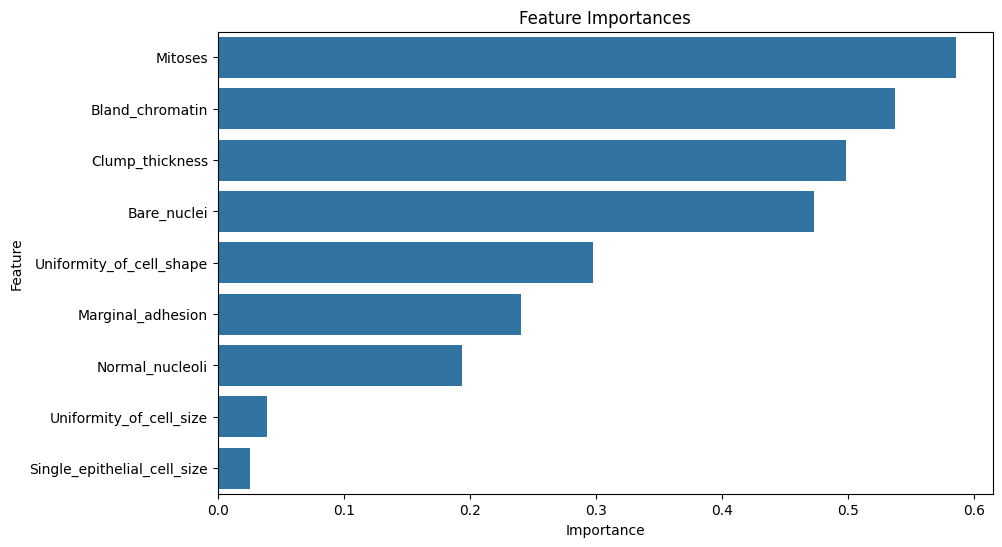

In [16]:
# prompt: Show and plot feature importances of the previous model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'logreg' is your trained logistic regression model and 'X' is your feature DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(logreg.coef_[0])})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9560975609756097
Recall: 0.9102564102564102
Precision: 0.9726027397260274
F1 Score: 0.9403973509933775
Confusion Matrix:
[[125   2]
 [  7  71]]
Specificity: 0.984251968503937


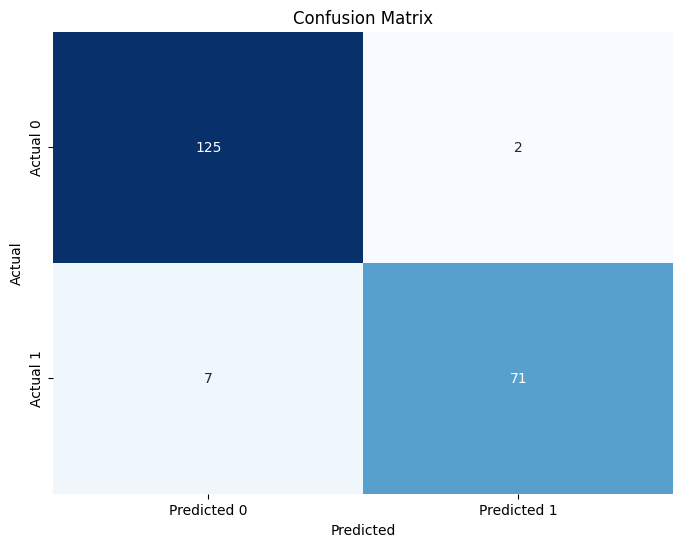

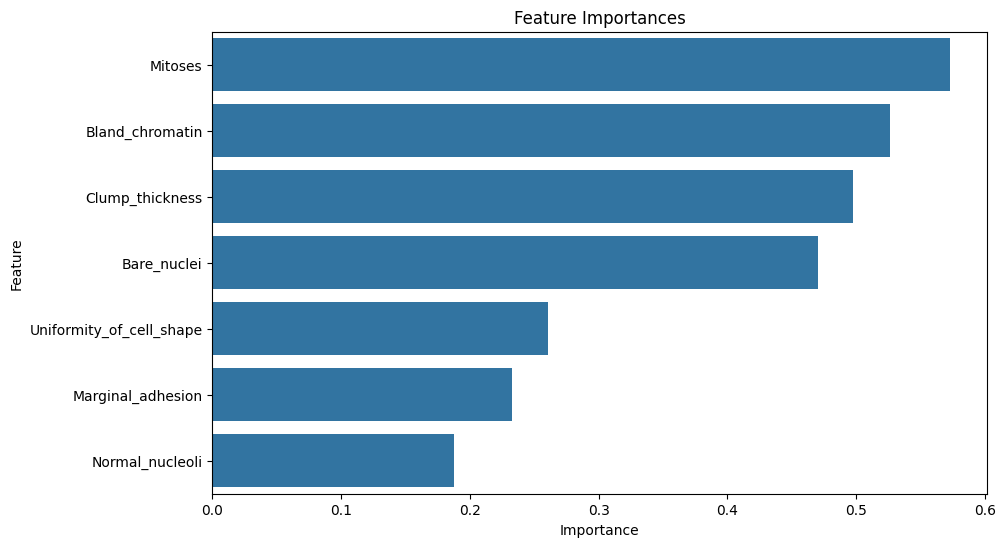

In [17]:
# prompt: Train the same classifier without Uniformity_of_cell_size and Single_epithelial_cell _size

# Drop the specified columns
X_new = X.drop(columns=['Uniformity_of_cell_size', 'Single_epithelial_cell_size'])

#Create train/test split with the new features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Initialize the logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Train the classifier
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importances for the new model
feature_importances = pd.DataFrame({'Feature': X_new.columns, 'Importance': abs(logreg.coef_[0])})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()